Assignment 0 - Task 1

# Data Dimensionality and Distance-Based Classifiers

In this assignment, we work with a simplified version of the MNIST dataset. We will explore data dimensionality, visualize the data using dimensionality reduction techniques, implement distance-based classifiers, and analyze their performance.

### Variable Indexing Explanation

- `*_1`: relates to the Nearest Mean Classifier
- `*_2a`: relates to the self-implemented K-Nearest Neighbor classifier
- `*_2b`: relates to the K-Nearest Neighbor classifier from the `sklearn` package
- `*_v1`: relates to the self-implemented confusion matrix approach
- `*_v2`: relates to the confusion matrix approach using the `sklearn` package

## 1. Calculating Digit Centers and Distances

In this section, we calculate the centers of each digit class and compute the distances between these centers.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist

### Load Data

In [2]:
# Load the data
train_x = pd.read_csv('train_in.csv', header=None).values
train_y = pd.read_csv('train_out.csv', header=None).values.flatten()
test_x = pd.read_csv('test_in.csv', header=None).values
test_y = pd.read_csv('test_out.csv', header=None).values.flatten()

### Compute Centers of Each Digit Class

In [3]:
# Initialize list for digit centers
centers = []

In [4]:
# Loop through digits and determine center for each digit
for d in range(10):
    d_images = train_x[train_y == d]
    d_center = d_images.mean(axis=0)
    centers.append(d_center)

In [5]:
# Convert list to array
centers = np.array(centers)

### Compute Distances Between Centers

In [6]:
# Compute matrix of Euclidean distances between digit centers
center_center_dist_matrix = cdist(centers, centers, metric='euclidean')

### Analyze Distances

In [7]:
# Display the distance matrix
import seaborn as sns
import matplotlib.pyplot as plt

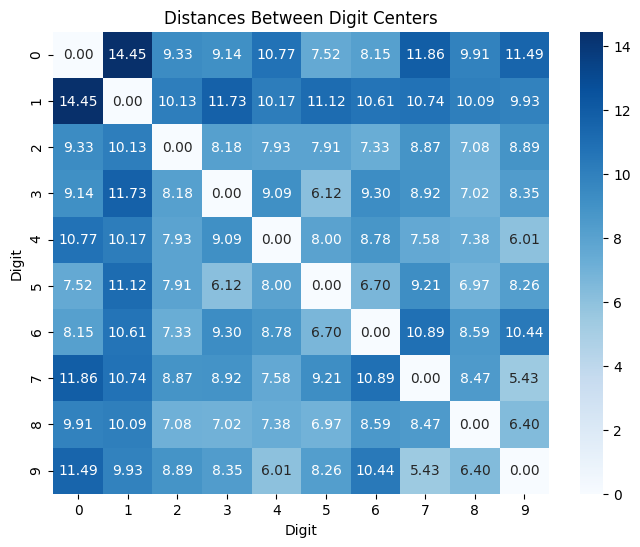

In [8]:
plt.figure(figsize=(8, 6))
sns.heatmap(center_center_dist_matrix, annot=True, fmt=".2f", cmap='Blues')
plt.title('Distances Between Digit Centers')
plt.xlabel('Digit')
plt.ylabel('Digit')
plt.show()

### Discussion

Based on the distances between the centers, it seems that 7/9, 4/9, and 3/5 are most difficult to separate.

## 2. Dimensionality Reduction and Visualization

In this section, we apply three dimensionality reduction algorithms (PCA, t-SNE, and UMAP) to visualize the data in 2D.

### Import Libraries

In [9]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap
import matplotlib.pyplot as plt

### Define a Function for Plotting

In [10]:
def plot_2d_reduction(reduced_data, title):
    plt.figure(figsize=(10, 7))
    scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=train_y, cmap='tab10', alpha=0.6)
    plt.colorbar()
    plt.title(title)
    plt.show()

### Apply PCA

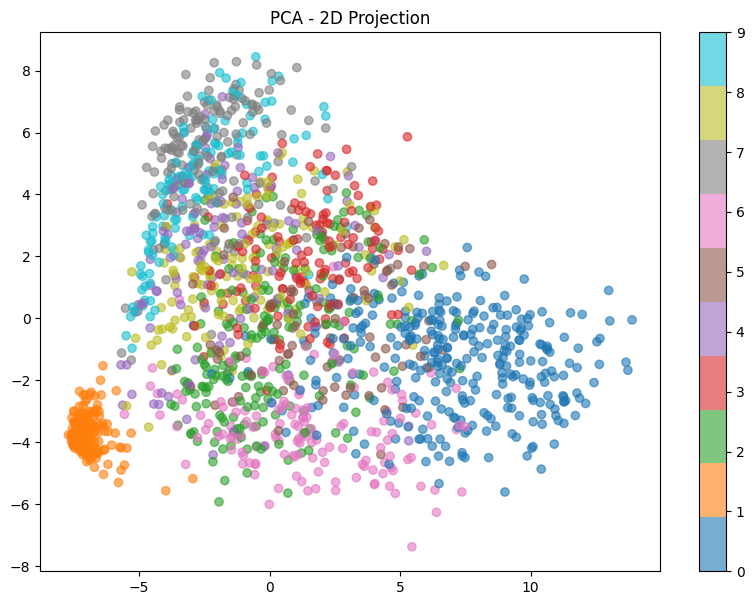

In [11]:
# Principal Component Analysis (PCA)
pca = PCA(n_components=2)
train_pca = pca.fit_transform(train_x)
plot_2d_reduction(train_pca, 'PCA - 2D Projection')

### Apply t-SNE

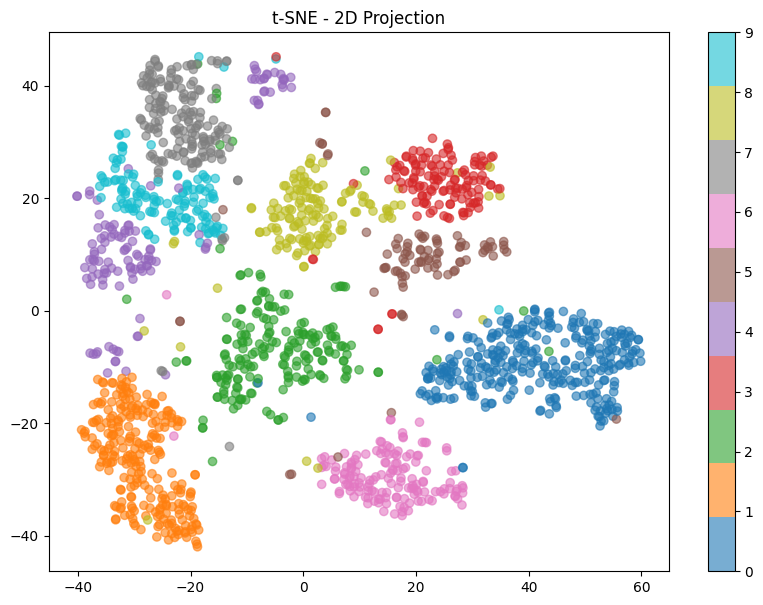

In [12]:
# t-Distributed Stochastic Neighbor Embedding (t-SNE)
tsne = TSNE(n_components=2)
train_tsne = tsne.fit_transform(train_x)
plot_2d_reduction(train_tsne, 't-SNE - 2D Projection')

### Apply UMAP

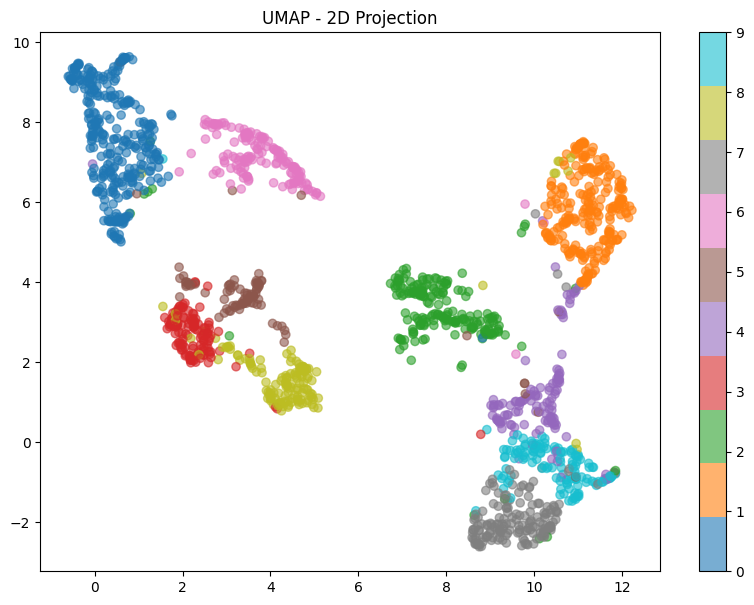

In [13]:
# Uniform Manifold Approximation and Projection (UMAP)
u_reducer = umap.UMAP(n_components=2)
train_umap = u_reducer.fit_transform(train_x)
plot_2d_reduction(train_umap, 'UMAP - 2D Projection')

### Discussion

The 2D visualizations of the data seem to agree with the distance matrix above. Moreover, the distributions of different digit classes in the reduced space preserve quite a few intuitions about the (dis)similarity of digit shapes.

## 3. Nearest Mean Classifier

We implement a Nearest Mean Classifier using the mean pixel values (centers) of each digit category.

### Implement the Nearest Mean Classifier

In [14]:
def nearest_mean_classifier(images, means):
    # Compute matrix of Euclidean distances between input images and means (digit centers)
    img_center_dist_matrix = cdist(images, means, metric='euclidean')
    
    # Determine the nearest mean for each image
    classifications = np.argmin(img_center_dist_matrix, axis=1)
    return classifications

### Classify Training and Test Images

In [15]:
# Classify the images from the training and test sets
train_classifications_1 = nearest_mean_classifier(train_x, centers)
test_classifications_1 = nearest_mean_classifier(test_x, centers)

### Evaluate Classifier Performance

In [16]:
# Determine if classifications were correct
train_correct_1 = train_classifications_1 == train_y
test_correct_1 = test_classifications_1 == test_y

In [17]:
# Compute classification accuracy
train_accuracy_1 = train_correct_1.mean()
test_accuracy_1 = test_correct_1.mean()

In [18]:
print(f'Training Accuracy: {train_accuracy_1 * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy_1 * 100:.2f}%')

Training Accuracy: 86.35%
Test Accuracy: 80.40%


## 4. K-Nearest Neighbor Classifier

We implement and evaluate a K-Nearest Neighbor (KNN) classifier.

## 4a. Self-Implemented KNN Classifier

### Implement the KNN Classifier

In [19]:
def KNN_classifier(images, K, training_images, training_labels):
    # Compute distances between input images and training images
    img_img_dist_matrix = cdist(images, training_images, metric='euclidean')
    
    classifications = []
    
    for img in range(images.shape[0]):
        # Get distances and indices
        dist = img_img_dist_matrix[img]
        sorted_indices = np.argsort(dist)
        
        # Exclude the current image if in training set
        if np.array_equal(images, training_images) and dist[sorted_indices[0]] == 0:
            sorted_indices = sorted_indices[1:]
        
        K_indices = sorted_indices[:K]
        K_labels = training_labels[K_indices]
        
        # Determine the most frequent label
        unique_labels, counts = np.unique(K_labels, return_counts=True)
        max_count = np.max(counts)
        modes = unique_labels[counts == max_count]
        classification = np.random.choice(modes)
        classifications.append(classification)
    
    return np.array(classifications)

### Classify Training and Test Images

In [20]:
K = 5  # Number of neighbors

In [21]:
# Classify the images from the training and test sets
train_classifications_2a = KNN_classifier(train_x, K, train_x, train_y)
test_classifications_2a = KNN_classifier(test_x, K, train_x, train_y)

### Evaluate Classifier Performance

In [22]:
# Determine if classifications were correct
train_correct_2a = train_classifications_2a == train_y
test_correct_2a = test_classifications_2a == test_y

In [23]:
# Compute classification accuracy
train_accuracy_2a = train_correct_2a.mean()
test_accuracy_2a = test_correct_2a.mean()

In [24]:
print(f'Self-Implemented KNN Training Accuracy: {train_accuracy_2a * 100:.2f}%')
print(f'Self-Implemented KNN Test Accuracy: {test_accuracy_2a * 100:.2f}%')

Self-Implemented KNN Training Accuracy: 94.61%
Self-Implemented KNN Test Accuracy: 91.50%


### Compute Confusion Matrices (Self-Implemented Version)

### Define Function to Compute Confusion Matrix

In [25]:
def conf_matrix(classifications, ground_truth):
    classes = np.unique(ground_truth)
    c_matrix = np.zeros((len(classes), len(classes)))
    
    for d_truth in classes:
        d_truth_classifications = classifications[ground_truth == d_truth]
        for d_guess in classes:
            d_guess_count = np.sum(d_truth_classifications == d_guess)
            d_guess_percent = d_guess_count / len(d_truth_classifications)
            c_matrix[int(d_truth), int(d_guess)] = d_guess_percent
                
    return c_matrix

### Compute and Plot Confusion Matrices

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay

In [27]:
def plot_c_matrix(c_matrix, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix)
    disp.plot(cmap='Blues', ax=ax)
    plt.title(title)
    plt.show()

In [28]:
# Compute confusion matrices
train_c_matrix_1_v1 = conf_matrix(train_classifications_1, train_y)
test_c_matrix_1_v1 = conf_matrix(test_classifications_1, test_y)
train_c_matrix_2a = conf_matrix(train_classifications_2a, train_y)
test_c_matrix_2a = conf_matrix(test_classifications_2a, test_y)

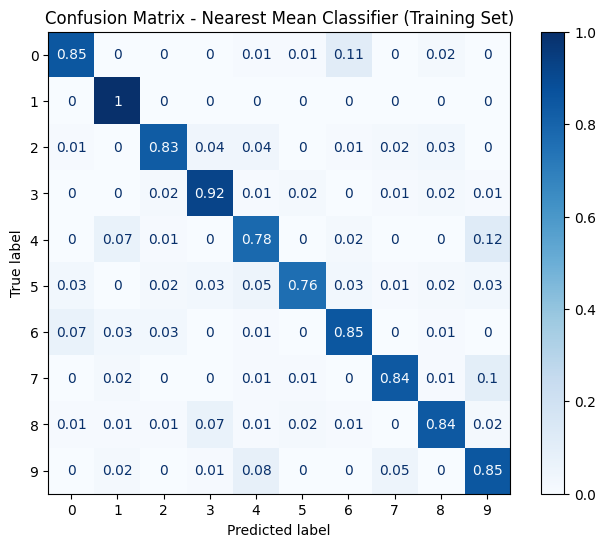

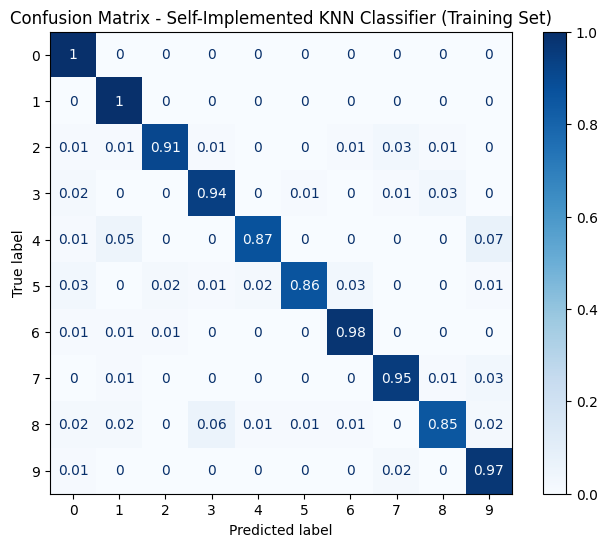

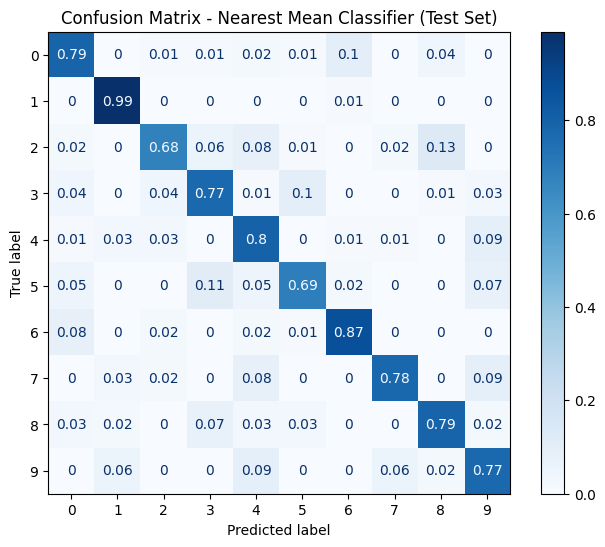

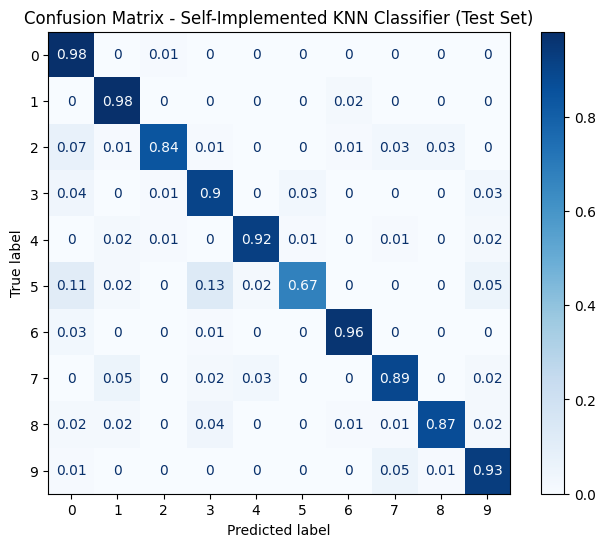

In [29]:
# Plot confusion matrices
plot_c_matrix(np.round(train_c_matrix_1_v1, 2), 'Confusion Matrix - Nearest Mean Classifier (Training Set)')
plot_c_matrix(np.round(train_c_matrix_2a, 2), 'Confusion Matrix - Self-Implemented KNN Classifier (Training Set)')
plot_c_matrix(np.round(test_c_matrix_1_v1, 2), 'Confusion Matrix - Nearest Mean Classifier (Test Set)')
plot_c_matrix(np.round(test_c_matrix_2a, 2), 'Confusion Matrix - Self-Implemented KNN Classifier (Test Set)')

## 4b. KNN Classifier Using sklearn

### Import Libraries

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

### Implement the KNN Classifier

In [31]:
# Create the KNN classifier
knn = KNeighborsClassifier(n_neighbors=K)

In [32]:
# Fit the classifier to the training data
knn.fit(train_x, train_y)

KNeighborsClassifier()

In [33]:
# Classify the images from the training and test sets
train_classifications_2b = knn.predict(train_x)
test_classifications_2b = knn.predict(test_x)

### Evaluate Classifier Performance

In [34]:
# Determine if classifications were correct
train_correct_2b = train_classifications_2b == train_y
test_correct_2b = test_classifications_2b == test_y

In [35]:
# Compute classification accuracy
train_accuracy_2b = train_correct_2b.mean()
test_accuracy_2b = test_correct_2b.mean()

In [36]:
print(f'sklearn KNN Training Accuracy: {train_accuracy_2b * 100:.2f}%')
print(f'sklearn KNN Test Accuracy: {test_accuracy_2b * 100:.2f}%')

sklearn KNN Training Accuracy: 96.60%
sklearn KNN Test Accuracy: 90.80%


### Compute Confusion Matrices (sklearn Version)

In [37]:
# Compute confusion matrices
train_c_matrix_1_v2 = confusion_matrix(train_y, train_classifications_1)
test_c_matrix_1_v2 = confusion_matrix(test_y, test_classifications_1)
train_c_matrix_2b = confusion_matrix(train_y, train_classifications_2b)
test_c_matrix_2b = confusion_matrix(test_y, test_classifications_2b)

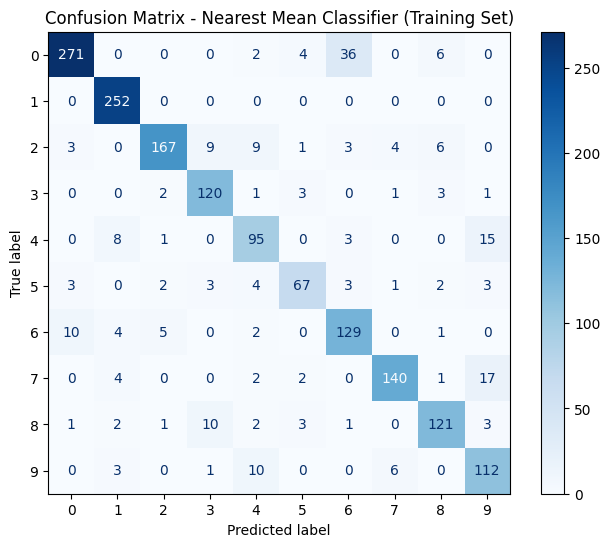

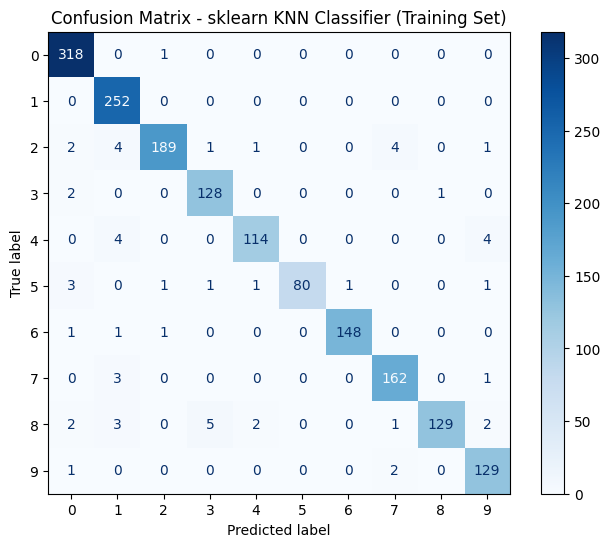

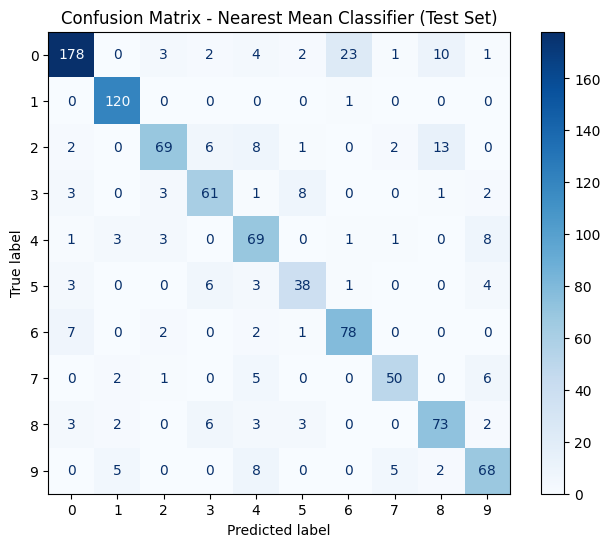

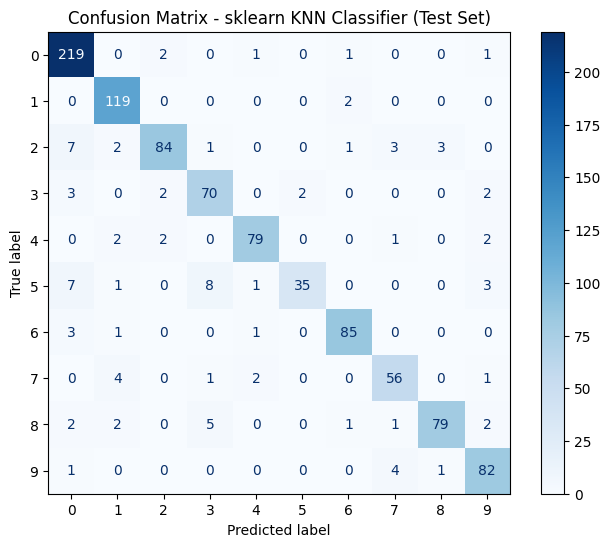

In [38]:
# Plot confusion matrices
plot_c_matrix(train_c_matrix_1_v2, 'Confusion Matrix - Nearest Mean Classifier (Training Set)')
plot_c_matrix(train_c_matrix_2b, 'Confusion Matrix - sklearn KNN Classifier (Training Set)')
plot_c_matrix(test_c_matrix_1_v2, 'Confusion Matrix - Nearest Mean Classifier (Test Set)')
plot_c_matrix(test_c_matrix_2b, 'Confusion Matrix - sklearn KNN Classifier (Test Set)')

### Discussion

According to the confusion matrices, the digits 5 and 2 are most difficult to classify correctly.

The KNN classifier showed better performance (higher accuracy) than the nearest mean classifier for both the training and test sets.